In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = cv2.imread('/home/karandeep/Downloads/coin.jpg',1)


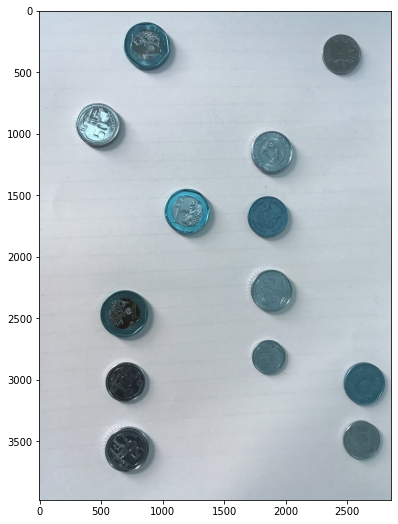

In [3]:
img_org=image.copy()
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(image)

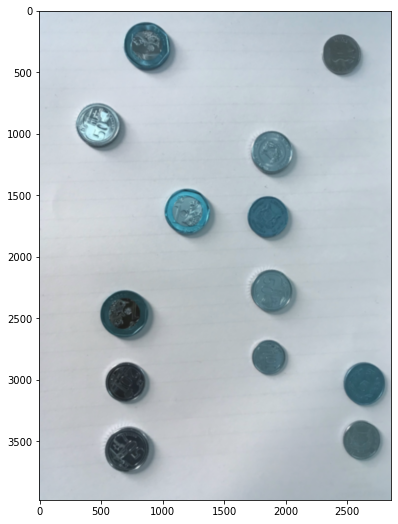

In [4]:
image=cv2.GaussianBlur(image,(31,31), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(image, cmap="gray")

In [5]:
#Detecting the coins using HOUGH CIRCLE TRANSFORM
#Parameters like minDist, minRadius, maxRadius can vary from image to image
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.3, minDist=90, param1=50, param2=30, minRadius=90, maxRadius=220)
circles = np.uint16(np.around(circles_float))
print(circles)
print(circles.shape)

[[[1856 1676  166]
  [1204 1637  182]
  [ 471  931  172]
  ...
  [ 643 1676  180]
  [2426 3024  103]
  [ 404 1750   93]]]
(1, 390, 3)


In [6]:

#Reduce the dimension and sort along 0th index(x-coordinate of the centres of the circles)
circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()]
print(circles)
print(circles.shape)

[[ 119 1899  123]
 [ 176  873  215]
 [ 192 2304  192]
 ...
 [2775 3687  216]
 [2802 3447  133]
 [2802 3225  202]]
(390, 3)


In [7]:

#----------------------------Algorithm for finding the coins that fall under the same st.line (Vertical)--------------------------------------

#We find all the circles whose x-coordinates of the centres have difference less than 40(say)
#If the diff. in x-coordinates of the centre are more than 40, we say that circles are not aligned i.e, not along same st.line
lines = np.empty([0,3] ,dtype=int)

i=0
while(i < circles.shape[0] - 1):
    j=i+1
    b=False
    nxt=1
    min_y = circles[i][1]
    max_y = circles[i][1]
    while(j < circles.shape[0]):
        if(circles[j][0] - circles[i][0] <= 1200): #Here the number '40' might vary from image to image
            x1 = circles[i][0]
            if circles[j][1] < min_y:
                min_y = circles[j][1]
            
            x2 = circles[j][0]
            if circles[j][1] > max_y:
                max_y = circles[j][1]
                
            b=True
            nxt+=1
            
        j=j+1
    if b:
        x=int(np.mean([x1,x2]))
        lines = np.append(lines, [[x, min_y, max_y]], axis=0)
    i+=nxt

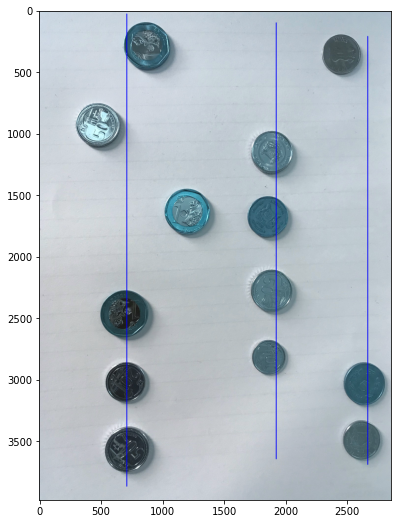

In [8]:

#Drawing lines for coins that fall under the same straight line.(Vertical)
output = img_org.copy()
for i in range(lines.shape[0]):
    output = cv2.line(output, (lines[i][0],lines[i][1]), (lines[i][0],lines[i][2]), (0,0,255), 6)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(output)